In [1715]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests
import os
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 200)

## Fetch Data

In [1716]:
standings_ulrs = {
    "Serie A": "http://api.football-data.org/v4/competitions/SA/standings",
    "Bundesliga": "http://api.football-data.org/v4/competitions/BL1/standings",
    "La Liga": "http://api.football-data.org/v4/competitions/PD/standings",
    "Premier League": "http://api.football-data.org/v4/competitions/PL/standings"
}
headers = {"X-Auth-Token": os.getenv('footaball_data_token')}

### Standing

In [1717]:
standings = {}

for competition, url in standings_ulrs.items():
    response = requests.get(url, headers=headers)

    data = response.json()
    data = data['standings'][0]['table']
    standing = pd.DataFrame(data)

    # Extract the 'shortName' value from the 'team' dictionary
    standing['team_short_name'] = standing['team'].apply(lambda x: x['shortName'])
    # Drop the 'team' column
    standing.drop(columns=['team'], inplace=True)
    
    n_groups = 3
    standing['team_group'] = standing.position.apply(lambda x: int(((x-1)/(20/n_groups))))
    standing['team_short_name'] = \
                standing['team_short_name']\
                        .replace({
                        'Spezia Calcio':'Spezia',
                        #
                        'Frankfurt':'Ein Frankfurt', 
                        '1. FC Köln': 'FC Koln',
                        'Hertha BSC': 'Hertha', 
                        'Bremen': 'Werder Bremen', 
                        'Schalke': 'Schalke 04', 
                        'Bayern': 'Bayern Munich',
                        #
                        'Barça':'Barcelona', 
                        'Cádiz CF': 'Cadiz', 
                        'Almería': 'Almeria', 
                        'Athletic':'Ath Bilbao', 
                        'Real Betis': 'Betis', 
                        'Espanyol': 'Espanol',
                        'Sevilla FC': 'Sevilla',
                        'Atleti': 'Ath Madrid', 
                        'Real Sociedad':'Sociedad', 
                        'Rayo Vallecano': 'Vallecano',
                        #
                        'Leeds United':'Leeds', 
                        'Leicester City':'Leicester', 
                        'Brighton Hove':'Brighton',
                        'Wolverhampton':'Wolves', 
                        'Nottingham':"Nott'm Forest"
                        })

    standings[competition] = standing

### Match Days

In [1718]:
data_url = {
    "Serie A": "https://www.football-data.co.uk/mmz4281/2223/I1.csv",
    "Bundesliga": "https://www.football-data.co.uk/mmz4281/2223/D1.csv",
    "La Liga": "https://www.football-data.co.uk/mmz4281/2223/SP1.csv",
    "Premier League": "https://www.football-data.co.uk/mmz4281/2223/E0.csv"
}

data_paths = {
}

for competition, url in data_url.items():
    response = requests.get(url)
    filename = competition.replace(' ','_') + ".csv"
    file_dir = f"data/raw/{os.getenv('season')}/"
    file_path = f"{file_dir}{filename}"

    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    with open(file_path, "wb") as f:
        f.write(response.content)
        
    df = pd.read_csv(file_path)
    
    ### Fix MatchDays -----------------
    df.loc[(df.HomeTeam == 'Empoli') & (df.AwayTeam == 'Cremonese'),'Date'] = '12/11/2022'
    #Avoid no breaks
    df.loc[(df.HomeTeam == 'Brentford') & (df.AwayTeam == 'Liverpool'),'Date'] = '03/01/2023'
    df.loc[(df.HomeTeam == 'Villarreal') & (df.AwayTeam == 'Osasuna'),'Date'] = '16/10/2022'
    df.loc[(df.HomeTeam == 'Villarreal') & (df.AwayTeam == 'Vallecano'),'Date'] = '29/01/2023'
    df.loc[(df.HomeTeam == 'Vallecano') & (df.AwayTeam == 'Real Madrid'),'Date'] = '06/11/2022'
    df.loc[(df.HomeTeam == 'Real Madrid') & (df.AwayTeam == 'Elche'),'Date'] = '13/02/2023'
    #Matchday 7
    df.loc[(df.HomeTeam == 'Fulham') & (df.AwayTeam == 'Chelsea'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Crystal Palace') & (df.AwayTeam == 'Man United'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Man City') & (df.AwayTeam == 'Tottenham'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Arsenal') & (df.AwayTeam == 'Everton'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Liverpool') & (df.AwayTeam == 'Wolves'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Southampton') & (df.AwayTeam == 'Brentford'),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Leeds') & (df.AwayTeam == "Nott'm Forest"),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Bournemouth') & (df.AwayTeam == "Brighton"),'Date'] = '10/09/2022'
    df.loc[(df.HomeTeam == 'Leicester') & (df.AwayTeam == "Aston Villa"),'Date'] = '10/09/2022'
    #Matchday 8
    df.loc[(df.HomeTeam == 'Man United') & (df.AwayTeam == 'Leeds'),'Date'] = '16/09/2022'
    df.loc[(df.HomeTeam == 'Brighton') & (df.AwayTeam == 'Crystal Palace'),'Date'] = '16/09/2022'
    df.loc[(df.HomeTeam == 'Chelsea') & (df.AwayTeam == 'Liverpool'),'Date'] = '16/09/2023'
    #Matchday 12
    df.loc[(df.HomeTeam == 'Arsenal') & (df.AwayTeam == 'Man City'),'Date'] = '19/10/2022'
    #Matchday 17
    df.loc[(df.HomeTeam == 'Betis') & (df.AwayTeam == 'Barcellona'),'Date'] = '13/01/2023'
    df.loc[(df.HomeTeam == 'Real Madrid') & (df.AwayTeam == 'Valencia'),'Date'] = '13/01/2023'
    #Matchday 25
    df.loc[(df.HomeTeam == 'Man United') & (df.AwayTeam == 'Brentford'),'Date'] = '24/02/2023'
    ### Fix MatchDays -----------------
    
    df['datetime'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
    df['year'] = pd.to_datetime(df.Date, format='%d/%m/%Y').dt.year
    df['month'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.month
    df['day'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.day
    df['week'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.isocalendar().week
    df['weekday'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.weekday
    
    df = df.sort_values(['year', 'month', 'day'])
    
    # Assign sequential week numbers to blocks of days from Thursday to Wednesday
    giornata = 1
    curr_daytime = None
    for i, row in df.iterrows():
        curr_daytime = row['datetime'] if curr_daytime is None else curr_daytime
        if(curr_daytime is not None):
            if (row['datetime'] - curr_daytime)/ np.timedelta64(1, 'D') > 1:
                giornata+=1
        else:
            giornata+=1
        curr_daytime = row['datetime']
        df.at[i, 'giornata'] = giornata
        
    file_clean_dir = f"data/clean/{os.getenv('season')}/"
    if not os.path.exists(file_clean_dir):
        os.makedirs(file_clean_dir)

    df.to_csv(f"{file_clean_dir}{filename}", index=False)
    data_paths[competition] = f"{file_clean_dir}{filename}"

## Data Preparations

#### Create main dataframe with all leagues

In [1719]:
matches_raw_df = None
for competition, data_path in data_paths.items():
    df_ = pd.read_csv(data_paths[competition], index_col=None)
    df_['competition'] = competition
    if(matches_raw_df is None):
        matches_raw_df = df_
    else:
        matches_raw_df = pd.concat([matches_raw_df,df_])

In [1720]:
matches_raw_df[matches_raw_df.competition=='Serie A'].tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgCAHA,datetime,year,month,day,week,weekday,giornata,competition,Referee
295,I1,16/04/2023,11:30,Lecce,Sampdoria,1,1,D,1,0,...,1.87,2023-04-16,2023,4,16,15,6,30.0,Serie A,NaN
296,I1,16/04/2023,14:00,Torino,Salernitana,1,1,D,0,1,...,1.80,2023-04-16,2023,4,16,15,6,30.0,Serie A,NaN
297,I1,16/04/2023,17:00,Sassuolo,Juventus,1,0,H,0,0,...,1.90,2023-04-16,2023,4,16,15,6,30.0,Serie A,NaN
298,I1,16/04/2023,19:45,Roma,Udinese,3,0,H,1,0,...,1.99,2023-04-16,2023,4,16,15,6,30.0,Serie A,NaN
299,I1,17/04/2023,19:45,Fiorentina,Atalanta,1,1,D,0,1,...,1.84,2023-04-17,2023,4,17,16,0,30.0,Serie A,NaN


#### Check matchday number uniqueness

In [1721]:
tt1 = df[['HomeTeam','giornata']]
tt1.columns = ['team','giornata']
tt1['value'] = 1
tt2 = df[['AwayTeam','giornata']]
tt2.columns = ['team','giornata']
tt2['value'] = 1
assert (pd.concat([tt1,tt2]).groupby(['team','giornata']).count() > 1).sum()['value'] == 0,\
        'Some teams have the same matchday associated more than once'

In [1722]:
s = pd.concat([tt1,tt2]).groupby(['team','giornata']).count().reset_index()
s[s.value > 1]

,team,giornata,value


In [1723]:
standings_df = None
for competition, standing in standings.items():
    df_ = standings[competition]
    df_['competition'] = competition
    if(standings_df is None):
        standings_df = df_
    else:
        standings_df = pd.concat([standings_df,df_])
standings_df.to_csv('data/outputs/standings.csv', index=False)
standings_df.head()

,position,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group,competition
0,1,30,None,24,3,3,75,66,21,45,Napoli,0,Serie A
1,2,30,None,18,7,5,61,49,20,29,Lazio,0,Serie A
2,3,30,None,17,5,8,56,42,26,16,Roma,0,Serie A
3,4,30,None,15,8,7,53,49,37,12,Milan,0,Serie A
4,5,30,None,16,3,11,51,48,34,14,Inter,0,Serie A


In [1724]:
def get_result(row):
    if(row['goal_fatti'] > row['goal_subiti']):
        return 'Win'
    if(row['goal_fatti'] == row['goal_subiti']):
        return 'Draw'
    return 'Loss'

In [1725]:
df = matches_raw_df
df_match_home = df
df_match_home['main_team'] = df.HomeTeam
df_match_home['opponent_team'] = df.AwayTeam
df_match_home['goal_fatti'] = df['FTHG']
df_match_home['goal_subiti'] = df['FTAG']
df_match_home['tot_goals'] = df['goal_fatti'] + df['goal_subiti']
df_match_home['no_goal'] = (df['goal_fatti'] == 0) | (df['goal_subiti'] == 0)
df_match_home['goal'] = (df['goal_fatti'] != 0) & (df['goal_subiti'] != 0)
df_match_home['goal_no_goal'] = df_match_home['no_goal'].map({True: 'No Goal', False: 'Goal'})
df_match_home['away_home'] = 'home'
df_match_home['result'] = df_match_home.apply(get_result, axis=1)
df_match_home['team_has_scored'] = df_match_home['goal_fatti'] > 0
df_match_home['team_has_conceded_goal'] = df_match_home['goal_subiti'] > 0
df_match_home = df_match_home[['main_team','opponent_team','goal_fatti', 'no_goal', 'goal', 'tot_goals',\
                               'goal_subiti','away_home','result','team_has_scored','giornata','goal_no_goal',\
                              'team_has_conceded_goal','competition']]

df_match_away = df
df_match_away['main_team'] = df.AwayTeam
df_match_away['opponent_team'] = df.HomeTeam
df_match_away['goal_fatti'] = df['FTAG']
df_match_away['goal_subiti'] = df['FTHG']
df_match_away['tot_goals'] = df['goal_fatti'] + df['goal_subiti']
df_match_away['away_home'] = 'away'
df_match_away['result'] = df_match_away.apply(get_result, axis=1)
df_match_away['team_has_scored'] = df_match_away['goal_fatti'] > 0
df_match_away['team_has_conceded_goal'] = df_match_away['goal_subiti'] > 0
df_match_away['no_goal'] = (df['goal_fatti'] == 0) | (df['goal_subiti'] == 0)
df_match_away['goal'] = (df['goal_fatti'] != 0) & (df['goal_subiti'] != 0)
df_match_away['goal_no_goal'] = df_match_away['no_goal'].map({True: 'No Goal', False: 'Goal'})
df_match_away = df_match_away[['main_team','opponent_team','goal_fatti', 'no_goal', 'goal', 'tot_goals',\
                               'goal_subiti','away_home','result','team_has_scored','giornata','goal_no_goal',\
                              'team_has_conceded_goal','competition']]
matches_df = pd.concat([df_match_home, df_match_away])
matches_df = matches_df.merge(standings_df, on='competition')
matches_df = matches_df[matches_df.opponent_team == matches_df.team_short_name]
matches_df.to_csv('data/outputs/matches.csv', index=False)
matches_df.head()

,main_team,opponent_team,goal_fatti,no_goal,goal,tot_goals,goal_subiti,away_home,result,team_has_scored,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
11,Milan,Udinese,4,False,True,6,2,home,Win,True,...,None,9,12,9,39,39,39,0,Udinese,1
25,Sampdoria,Atalanta,0,True,False,2,2,home,Loss,False,...,None,14,7,9,49,48,35,13,Atalanta,0
44,Lecce,Inter,1,False,True,3,2,home,Loss,True,...,None,16,3,11,51,48,34,14,Inter,0
70,Monza,Torino,1,False,True,3,2,home,Loss,True,...,None,10,9,11,39,31,36,-5,Torino,1
98,Fiorentina,Cremonese,3,False,True,5,2,home,Win,True,...,None,3,10,17,19,27,54,-27,Cremonese,2


In [1726]:
assert len(matches_df[matches_df.team_group.isna()]) == 0, 'Some teams have no correpondence in standing'

## Metrics Calculation

In [1727]:
tt = matches_df.copy()
tt_all = matches_df.copy()
tt_all['team_group'] = 'all'
tt = pd.concat([tt, tt_all])
tt['no_goal_streak_weighted'] = tt['no_goal'] * tt['giornata']
tt['goal_streak_weighted'] = tt['goal'] * tt['giornata']
tt['team_has_scored_streak_weighted'] = tt['team_has_scored'] * tt['giornata']
tt['team_has_conceded_goal_streak_weighted'] = tt['team_has_conceded_goal'] * tt['giornata']
tt['win'] = tt['goal_fatti'] > tt['goal_subiti']
tt['draw'] = tt['goal_fatti'] == tt['goal_subiti']
tt['loss'] = tt['goal_fatti'] < tt['goal_subiti']
tt['win_streak_weighted'] = tt['win'] * tt['giornata']
tt['draw_streak_weighted'] = tt['draw'] * tt['giornata']
tt['loss_streak_weighted'] = tt['loss'] * tt['giornata']

### NoGoal - Goal - Group

#### Simulate historical

In [1728]:
giornata = 1
no_goal_group_hist = None
for giornata in range(0,int(tt.giornata.max())):
    ttg = tt[tt.giornata <= giornata]
    tt1 = ttg[['main_team','no_goal','team_group','competition']].groupby(['main_team','team_group','competition']).count().reset_index().rename(columns={'no_goal':'n_matches'})
    tt2 = ttg[['main_team','no_goal','team_group','competition','no_goal_streak_weighted','goal_streak_weighted', 'giornata']].groupby(['main_team','team_group','competition']).sum().reset_index().rename(columns={'giornata':'tot_giornata'})
    tt3 = tt1.merge(tt2, on=['main_team','team_group','competition'])
    tt3['no_goal_streak_weighted_ratio'] = tt3['no_goal_streak_weighted']/tt3['tot_giornata']
    tt3['goal_streak_weighted_ratio'] = tt3['goal_streak_weighted']/tt3['tot_giornata']
    tt3['no_goal_ratio'] = tt3['no_goal']/tt3['n_matches']
    tt3['goal_ratio'] = 1 - tt3['no_goal_ratio']
    tt3['curr_giornata'] = giornata
    if no_goal_group_hist is None:
        no_goal_group_hist = tt3
    else:
        no_goal_group_hist = pd.concat([no_goal_group_hist, tt3])
no_goal_group_hist.to_csv('data/outputs/simulate_historical/no_goal_group.csv', index=False)
no_goal_group_hist.tail()

,n_matches,main_team,team_group,competition,no_goal,no_goal_streak_weighted,goal_streak_weighted,tot_giornata,no_goal_streak_weighted_ratio,goal_streak_weighted_ratio,no_goal_ratio,goal_ratio,curr_giornata
307,28,Wolfsburg,all,Bundesliga,16,237.0,169.0,406.0,0.583744,0.416256,0.571429,0.428571,32
308,10,Wolves,0,Premier League,6,92.0,65.0,157.0,0.585987,0.414013,0.600000,0.400000,32
309,11,Wolves,1,Premier League,8,133.0,51.0,184.0,0.722826,0.277174,0.727273,0.272727,32
310,10,Wolves,2,Premier League,5,59.0,98.0,157.0,0.375796,0.624204,0.500000,0.500000,32
311,31,Wolves,all,Premier League,19,284.0,214.0,498.0,0.570281,0.429719,0.612903,0.387097,32


#### Current giornata

In [1729]:
last_matches = matches_df[['competition','giornata']]\
    .groupby('competition')\
    .max()\
    .reset_index()\
    .rename(columns={'giornata':'last_giornata'})

In [1730]:
no_goal_group_last_match = no_goal_group_hist.merge(last_matches,
                    left_on=['competition','curr_giornata'],
                    right_on=['competition','last_giornata'])
no_goal_group_last_match.to_csv('data/outputs/no_goal_group.csv', index=False)
no_goal_group_last_match.head()

,n_matches,main_team,team_group,competition,no_goal,no_goal_streak_weighted,goal_streak_weighted,tot_giornata,no_goal_streak_weighted_ratio,goal_streak_weighted_ratio,no_goal_ratio,goal_ratio,curr_giornata,last_giornata
0,11,Augsburg,0,Bundesliga,3,27.0,126.0,153.0,0.176471,0.823529,0.272727,0.727273,28,28.0
1,11,Augsburg,1,Bundesliga,4,48.0,118.0,166.0,0.289157,0.710843,0.363636,0.636364,28,28.0
2,6,Augsburg,2,Bundesliga,3,42.0,45.0,87.0,0.482759,0.517241,0.500000,0.500000,28,28.0
3,28,Augsburg,all,Bundesliga,10,117.0,289.0,406.0,0.288177,0.711823,0.357143,0.642857,28,28.0
4,11,Bayern Munich,0,Bundesliga,4,67.0,100.0,167.0,0.401198,0.598802,0.363636,0.636364,28,28.0


#### Home/Away

In [1731]:
tt1 = tt[['main_team','no_goal','team_group','away_home','competition']]\
        .groupby(['main_team','team_group','away_home','competition'])\
        .count()\
        .reset_index()\
        .rename(columns={'no_goal':'n_matches'})
tt2 = tt[['main_team','no_goal','team_group','goal_streak_weighted','no_goal_streak_weighted', 'giornata','away_home','competition']]\
        .groupby(['main_team','team_group','away_home','competition'])\
        .sum()\
        .reset_index()\
        .rename(columns={'giornata':'tot_giornata'})
tt3 = tt1.merge(tt2, on=['main_team','team_group','away_home','competition'])
tt3['goal_streak_weighted_ratio'] = tt3['goal_streak_weighted']/tt3['tot_giornata']
tt3['no_goal_streak_weighted_ratio'] = tt3['no_goal_streak_weighted']/tt3['tot_giornata']
tt3['no_goal_ratio'] = tt3['no_goal']/tt3['n_matches']
tt3['goal_ratio'] = 1 - tt3['no_goal_ratio']
no_goal_group_away_home = tt3.copy()
no_goal_group_away_home.to_csv('data/outputs/no_goal_group_away_home.csv', index=False)
no_goal_group_away_home.head()

,main_team,team_group,away_home,competition,n_matches,no_goal,goal_streak_weighted,no_goal_streak_weighted,tot_giornata,goal_streak_weighted_ratio,no_goal_streak_weighted_ratio,no_goal_ratio,goal_ratio
0,Almeria,0,away,La Liga,5,2,50.0,20.0,70.0,0.714286,0.285714,0.4,0.6
1,Almeria,0,home,La Liga,6,3,40.0,65.0,105.0,0.380952,0.619048,0.5,0.5
2,Almeria,1,away,La Liga,6,3,77.0,31.0,108.0,0.712963,0.287037,0.5,0.5
3,Almeria,1,home,La Liga,5,1,33.0,5.0,38.0,0.868421,0.131579,0.2,0.8
4,Almeria,2,away,La Liga,3,0,35.0,0.0,35.0,1.000000,0.000000,0.0,1.0


### N° Goal - Fatti/Subiti

In [1732]:
tt1 = tt[['main_team','giornata','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .count()\
        .reset_index()\
        .rename(columns={'giornata':'n_matches'})
tt2 = tt[['main_team','goal_fatti','goal_subiti','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .mean()\
        .reset_index()
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition']).rename(columns={
        'goal_subiti':'avg_goal_subiti',
        'goal_fatti':'avg_goal_fatti'
})
n_goal_group = tt3.copy()
n_goal_group.to_csv('data/outputs/num_goals_group.csv', index=False)
n_goal_group.head()

,main_team,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti
0,Almeria,0,La Liga,11,0.727273,2.090909
1,Almeria,1,La Liga,11,1.454545,1.818182
2,Almeria,2,La Liga,7,1.571429,1.000000
3,Almeria,all,La Liga,29,1.206897,1.724138
4,Arsenal,0,Premier League,9,2.222222,1.555556


##### Home/Away

In [1733]:
tt1 = tt[['main_team','giornata','away_home','team_group','competition']]\
        .groupby(['main_team','away_home','team_group','competition'])\
        .count()\
        .reset_index()\
        .rename(columns={'giornata':'n_matches'})
tt2 = tt[['main_team','goal_fatti','goal_subiti','team_group','away_home','competition']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .mean()\
        .reset_index()
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition','away_home']).rename(columns={
        'goal_subiti':'avg_goal_subiti',
        'goal_fatti':'avg_goal_fatti'
})
n_goal_group_away_home = tt3.copy()
n_goal_group_away_home.to_csv('data/outputs/n_goal_group_away_home.csv', index=False)
n_goal_group_away_home.head()

,main_team,away_home,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti
0,Almeria,away,0,La Liga,5,0.600000,2.600000
1,Almeria,away,1,La Liga,6,0.833333,2.333333
2,Almeria,away,2,La Liga,3,1.333333,1.333333
3,Almeria,away,all,La Liga,14,0.857143,2.214286
4,Almeria,home,0,La Liga,6,0.833333,1.666667


##### Last X Matches

In [1734]:
n_last_matches = 10

In [1735]:
max_match = tt[['competition','giornata']].groupby('competition').max().reset_index()
max_match = max_match.rename(columns={'giornata':'last_giornata'})
max_match

,competition,last_giornata
0,Bundesliga,28.0
1,La Liga,30.0
2,Premier League,33.0
3,Serie A,30.0


In [1736]:
ttt = tt.merge(max_match, on=['competition'])
ttt = ttt[ttt.giornata>ttt.last_giornata-n_last_matches]

In [1737]:
tt1 = ttt[['main_team','giornata','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .count()\
        .reset_index()\
        .rename(columns={'giornata':'n_matches'})
tt2 = ttt[['main_team','goal_fatti','goal_subiti','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .mean()\
        .reset_index()
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition']).rename(columns={
        'goal_subiti':'avg_goal_subiti',
        'goal_fatti':'avg_goal_fatti'
})
tt3['n_last_matches'] = n_last_matches
n_goal_group_last_matches = tt3.copy()
n_goal_group_last_matches.to_csv('data/outputs/n_goal_group_last_matches.csv', index=False)
n_goal_group_last_matches.head()

,main_team,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti,n_last_matches
0,Almeria,0,La Liga,4,1.00,1.75,10
1,Almeria,1,La Liga,4,1.25,3.00,10
2,Almeria,2,La Liga,2,1.50,1.00,10
3,Almeria,all,La Liga,10,1.20,2.10,10
4,Arsenal,0,Premier League,1,4.00,2.00,10


### Has Scored / Has Conceded Goal 

In [1738]:
tt1 = tt[['main_team','team_has_scored','team_group','competition']].groupby(['main_team','team_group','competition']).count().reset_index().rename(columns={'team_has_scored':'n_matches'})
tt2 = tt[['main_team','team_has_scored','team_has_conceded_goal','team_group','competition','team_has_scored_streak_weighted', 'team_has_conceded_goal_streak_weighted', 'giornata']].groupby(['main_team','team_group','competition']).sum().reset_index().rename(columns={'giornata':'tot_giornata'})
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition'])
tt3['team_has_scored_streak_weighted_ratio'] = tt3['team_has_scored_streak_weighted']/tt3['tot_giornata']
tt3['team_has_conceded_goal_streak_weighted_ratio'] = tt3['team_has_conceded_goal_streak_weighted']/tt3['tot_giornata']
tt3['team_has_conceded_goal_ratio'] = tt3['team_has_conceded_goal']/tt3['n_matches']
tt3['team_has_scored_ratio'] = tt3['team_has_scored']/tt3['n_matches']
scored_conceded_goal_group = tt3.copy()
scored_conceded_goal_group.to_csv('data/outputs/team_scored_conceded_goal_group.csv', index=False)
scored_conceded_goal_group.head()


,main_team,team_group,competition,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,11,7,10,114.0,151.0,175.0,0.651429,0.862857,0.909091,0.636364
1,Almeria,1,La Liga,11,7,11,110.0,146.0,146.0,0.753425,1.000000,1.000000,0.636364
2,Almeria,2,La Liga,7,7,6,124.0,110.0,124.0,1.000000,0.887097,0.857143,1.000000
3,Almeria,all,La Liga,29,21,27,348.0,407.0,445.0,0.782022,0.914607,0.931034,0.724138
4,Arsenal,0,Premier League,9,8,7,115.0,95.0,134.0,0.858209,0.708955,0.777778,0.888889


In [1739]:
tt1 = tt[['main_team','team_has_scored','team_group','competition','away_home']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .count().reset_index().rename(columns={'team_has_scored':'n_matches'})
tt2 = tt[['main_team','team_has_scored','team_has_conceded_goal',
          'team_group','competition','team_has_scored_streak_weighted',
          'team_has_conceded_goal_streak_weighted', 'giornata','away_home']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .sum().reset_index().rename(columns={'giornata':'tot_giornata'})
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition','away_home'])
tt3['team_has_scored_streak_weighted_ratio'] = tt3['team_has_scored_streak_weighted']/tt3['tot_giornata']
tt3['team_has_conceded_goal_streak_weighted_ratio'] = tt3['team_has_conceded_goal_streak_weighted']/tt3['tot_giornata']
tt3['team_has_conceded_goal_ratio'] = tt3['team_has_conceded_goal']/tt3['n_matches']
tt3['team_has_scored_ratio'] = tt3['team_has_scored']/tt3['n_matches']
scored_conceded_goal_group_away_home = tt3.copy()
scored_conceded_goal_group_away_home.to_csv('data/outputs/team_scored_conceded_goal_group_away_home.csv', index=False)
scored_conceded_goal_group_away_home.head()


,main_team,team_group,competition,away_home,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,away,5,3,5,50.0,70.0,70.0,0.714286,1.000000,1.000000,0.600000
1,Almeria,0,La Liga,home,6,4,5,64.0,81.0,105.0,0.609524,0.771429,0.833333,0.666667
2,Almeria,1,La Liga,away,6,3,6,77.0,108.0,108.0,0.712963,1.000000,1.000000,0.500000
3,Almeria,1,La Liga,home,5,4,5,33.0,38.0,38.0,0.868421,1.000000,1.000000,0.800000
4,Almeria,2,La Liga,away,3,3,3,35.0,35.0,35.0,1.000000,1.000000,1.000000,1.000000


### Win/Draw/Loss

In [1740]:
tt1 = tt[['main_team','giornata','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .count()\
        .reset_index()\
        .rename(columns={'giornata':'n_matches'})
tt11 = tt[['main_team','win_streak_weighted','draw_streak_weighted','loss_streak_weighted','giornata','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .sum()\
        .reset_index()\
        .rename(columns={'giornata':'tot_giornata'})
tt2 = tt[['main_team','win','draw','loss','team_group','competition']]\
        .groupby(['main_team','team_group','competition'])\
        .mean()\
        .reset_index()
tt3 = tt1.merge(tt2, on=['main_team','team_group','competition'])\
        .merge(tt11, on=['main_team','team_group','competition'])\
        .rename(columns={
            'win':'avg_win',
            'draw':'avg_draw',
            'loss':'avg_loss'
        })
tt3['win_streak_weighted_ratio'] = tt3['win_streak_weighted']/tt3['tot_giornata']
tt3['draw_streak_weighted_ratio'] = tt3['draw_streak_weighted']/tt3['tot_giornata']
tt3['loss_streak_weighted_ratio'] = tt3['loss_streak_weighted']/tt3['tot_giornata']
win_draw_loss = tt3.copy()
win_draw_loss.to_csv('data/outputs/win_draw_loss.csv', index=False)
win_draw_loss.head()

,main_team,team_group,competition,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,11,0.090909,0.090909,0.818182,24.0,17.0,134.0,175.0,0.137143,0.097143,0.765714
1,Almeria,1,La Liga,11,0.363636,0.090909,0.545455,33.0,28.0,85.0,146.0,0.226027,0.191781,0.582192
2,Almeria,2,La Liga,7,0.428571,0.571429,0.000000,62.0,62.0,0.0,124.0,0.500000,0.500000,0.000000
3,Almeria,all,La Liga,29,0.275862,0.206897,0.517241,119.0,107.0,219.0,445.0,0.267416,0.240449,0.492135
4,Arsenal,0,Premier League,9,0.666667,0.111111,0.222222,97.0,19.0,18.0,134.0,0.723881,0.141791,0.134328


In [1741]:
tt1 = tt[['main_team','giornata','team_group','away_home','competition']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .count()\
        .reset_index()\
        .rename(columns={'giornata':'n_matches'})
tt11 = tt[['main_team','win_streak_weighted','draw_streak_weighted','loss_streak_weighted','giornata','away_home','team_group','competition']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .sum()\
        .reset_index()\
        .rename(columns={'giornata':'tot_giornata'})
tt2 = tt[['main_team','win','draw','loss','team_group','away_home','competition']]\
        .groupby(['main_team','team_group','competition','away_home'])\
        .mean()\
        .reset_index()
tt3 = tt1.merge(tt2, on=['main_team','team_group','away_home','competition'])\
        .merge(tt11, on=['main_team','team_group','away_home','competition'])\
        .rename(columns={
            'win':'avg_win',
            'draw':'avg_draw',
            'loss':'avg_loss'
        })
tt3['win_streak_weighted_ratio'] = tt3['win_streak_weighted']/tt3['tot_giornata']
tt3['draw_streak_weighted_ratio'] = tt3['draw_streak_weighted']/tt3['tot_giornata']
tt3['loss_streak_weighted_ratio'] = tt3['loss_streak_weighted']/tt3['tot_giornata']
win_draw_loss_away_home = tt3.copy()
win_draw_loss_away_home.to_csv('data/outputs/win_draw_loss_away_home.csv', index=False)
win_draw_loss_away_home.head()

,main_team,team_group,competition,away_home,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,away,5,0.000000,0.000000,1.000000,0.0,0.0,70.0,70.0,0.000000,0.000000,1.000000
1,Almeria,0,La Liga,home,6,0.166667,0.166667,0.666667,24.0,17.0,64.0,105.0,0.228571,0.161905,0.609524
2,Almeria,1,La Liga,away,6,0.000000,0.166667,0.833333,0.0,28.0,80.0,108.0,0.000000,0.259259,0.740741
3,Almeria,1,La Liga,home,5,0.800000,0.000000,0.200000,33.0,0.0,5.0,38.0,0.868421,0.000000,0.131579
4,Almeria,2,La Liga,away,3,0.000000,1.000000,0.000000,0.0,35.0,0.0,35.0,0.000000,1.000000,0.000000


## Load Statistics

In [1742]:
win_draw_loss = pd.read_csv('data/outputs/win_draw_loss.csv')
win_draw_loss.head()

,main_team,team_group,competition,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,11,0.090909,0.090909,0.818182,24.0,17.0,134.0,175.0,0.137143,0.097143,0.765714
1,Almeria,1,La Liga,11,0.363636,0.090909,0.545455,33.0,28.0,85.0,146.0,0.226027,0.191781,0.582192
2,Almeria,2,La Liga,7,0.428571,0.571429,0.000000,62.0,62.0,0.0,124.0,0.500000,0.500000,0.000000
3,Almeria,all,La Liga,29,0.275862,0.206897,0.517241,119.0,107.0,219.0,445.0,0.267416,0.240449,0.492135
4,Arsenal,0,Premier League,9,0.666667,0.111111,0.222222,97.0,19.0,18.0,134.0,0.723881,0.141791,0.134328


In [1743]:
win_draw_loss_away_home = pd.read_csv('data/outputs/win_draw_loss_away_home.csv')
win_draw_loss_away_home.head()

,main_team,team_group,competition,away_home,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,away,5,0.000000,0.000000,1.000000,0.0,0.0,70.0,70.0,0.000000,0.000000,1.000000
1,Almeria,0,La Liga,home,6,0.166667,0.166667,0.666667,24.0,17.0,64.0,105.0,0.228571,0.161905,0.609524
2,Almeria,1,La Liga,away,6,0.000000,0.166667,0.833333,0.0,28.0,80.0,108.0,0.000000,0.259259,0.740741
3,Almeria,1,La Liga,home,5,0.800000,0.000000,0.200000,33.0,0.0,5.0,38.0,0.868421,0.000000,0.131579
4,Almeria,2,La Liga,away,3,0.000000,1.000000,0.000000,0.0,35.0,0.0,35.0,0.000000,1.000000,0.000000


In [1744]:
scored_conceded_goal_group_away_home= pd.read_csv('data/outputs/team_scored_conceded_goal_group_away_home.csv')
scored_conceded_goal_group_away_home.head()

,main_team,team_group,competition,away_home,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,away,5,3,5,50.0,70.0,70.0,0.714286,1.000000,1.000000,0.600000
1,Almeria,0,La Liga,home,6,4,5,64.0,81.0,105.0,0.609524,0.771429,0.833333,0.666667
2,Almeria,1,La Liga,away,6,3,6,77.0,108.0,108.0,0.712963,1.000000,1.000000,0.500000
3,Almeria,1,La Liga,home,5,4,5,33.0,38.0,38.0,0.868421,1.000000,1.000000,0.800000
4,Almeria,2,La Liga,away,3,3,3,35.0,35.0,35.0,1.000000,1.000000,1.000000,1.000000


In [1745]:
scored_conceded_goal_group = pd.read_csv('data/outputs/team_scored_conceded_goal_group.csv')
scored_conceded_goal_group.head()

,main_team,team_group,competition,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,11,7,10,114.0,151.0,175.0,0.651429,0.862857,0.909091,0.636364
1,Almeria,1,La Liga,11,7,11,110.0,146.0,146.0,0.753425,1.000000,1.000000,0.636364
2,Almeria,2,La Liga,7,7,6,124.0,110.0,124.0,1.000000,0.887097,0.857143,1.000000
3,Almeria,all,La Liga,29,21,27,348.0,407.0,445.0,0.782022,0.914607,0.931034,0.724138
4,Arsenal,0,Premier League,9,8,7,115.0,95.0,134.0,0.858209,0.708955,0.777778,0.888889


In [1746]:
no_goal_group = pd.read_csv('data/outputs/no_goal_group.csv')
no_goal_group.head()

,n_matches,main_team,team_group,competition,no_goal,no_goal_streak_weighted,goal_streak_weighted,tot_giornata,no_goal_streak_weighted_ratio,goal_streak_weighted_ratio,no_goal_ratio,goal_ratio,curr_giornata,last_giornata
0,11,Augsburg,0,Bundesliga,3,27.0,126.0,153.0,0.176471,0.823529,0.272727,0.727273,28,28.0
1,11,Augsburg,1,Bundesliga,4,48.0,118.0,166.0,0.289157,0.710843,0.363636,0.636364,28,28.0
2,6,Augsburg,2,Bundesliga,3,42.0,45.0,87.0,0.482759,0.517241,0.500000,0.500000,28,28.0
3,28,Augsburg,all,Bundesliga,10,117.0,289.0,406.0,0.288177,0.711823,0.357143,0.642857,28,28.0
4,11,Bayern Munich,0,Bundesliga,4,67.0,100.0,167.0,0.401198,0.598802,0.363636,0.636364,28,28.0


In [1747]:
no_goal_group_away_home = pd.read_csv('data/outputs/no_goal_group_away_home.csv')
no_goal_group_away_home.head()

,main_team,team_group,away_home,competition,n_matches,no_goal,goal_streak_weighted,no_goal_streak_weighted,tot_giornata,goal_streak_weighted_ratio,no_goal_streak_weighted_ratio,no_goal_ratio,goal_ratio
0,Almeria,0,away,La Liga,5,2,50.0,20.0,70.0,0.714286,0.285714,0.4,0.6
1,Almeria,0,home,La Liga,6,3,40.0,65.0,105.0,0.380952,0.619048,0.5,0.5
2,Almeria,1,away,La Liga,6,3,77.0,31.0,108.0,0.712963,0.287037,0.5,0.5
3,Almeria,1,home,La Liga,5,1,33.0,5.0,38.0,0.868421,0.131579,0.2,0.8
4,Almeria,2,away,La Liga,3,0,35.0,0.0,35.0,1.000000,0.000000,0.0,1.0


In [1748]:
n_goal_group = pd.read_csv('data/outputs/num_goals_group.csv')
n_goal_group.head()

,main_team,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti
0,Almeria,0,La Liga,11,0.727273,2.090909
1,Almeria,1,La Liga,11,1.454545,1.818182
2,Almeria,2,La Liga,7,1.571429,1.000000
3,Almeria,all,La Liga,29,1.206897,1.724138
4,Arsenal,0,Premier League,9,2.222222,1.555556


## Match Analysis

In [1749]:
competition = 'La Liga'

In [1750]:
standings_df[standings_df.competition==competition].team_short_name

0       Barcelona
1     Real Madrid
2      Ath Madrid
3        Sociedad
4           Betis
5      Villarreal
6      Ath Bilbao
7       Vallecano
8          Girona
9         Osasuna
10       Mallorca
11          Celta
12        Sevilla
13     Valladolid
14         Getafe
15          Cadiz
16        Almeria
17       Valencia
18        Espanol
19          Elche
Name: team_short_name, dtype: object

In [1751]:
home_team = "Ath Bilbao"
away_team = "Sociedad"

In [1752]:
home_team_group = str(standings_df[(standings_df.competition==competition)\
                     &(standings_df.team_short_name==home_team)]\
                .team_group.max())
away_team_group = str(standings_df[(standings_df.competition==competition)\
                     &(standings_df.team_short_name==away_team)]\
                .team_group.max())

### No Goal

In [1753]:
ng = pd.concat([no_goal_group[(no_goal_group.main_team == home_team)\
                        &(no_goal_group.competition==competition)\
                        &(no_goal_group.team_group.apply(str)=='all')],\
           no_goal_group[(no_goal_group.main_team == away_team)\
                        &(no_goal_group.competition==competition)\
                        &(no_goal_group.team_group.apply(str)=='all')]])

In [1754]:
ng[['main_team','n_matches','no_goal_ratio','no_goal_streak_weighted_ratio']]

,main_team,n_matches,no_goal_ratio,no_goal_streak_weighted_ratio
79,Ath Bilbao,29,0.620690,0.591011
135,Sociedad,29,0.586207,0.667416


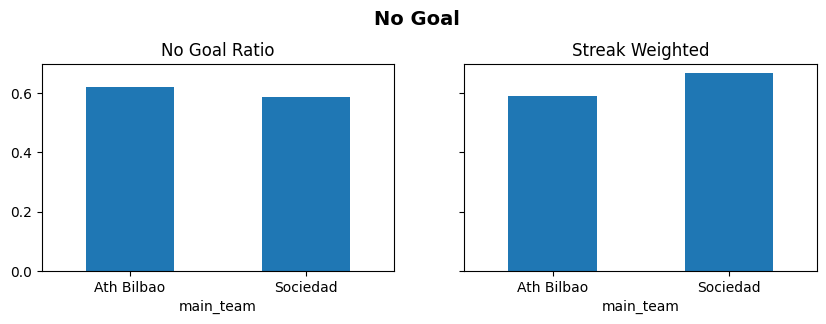

In [1755]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"No Goal", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

ng[['main_team','no_goal_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='No Goal Ratio', ax=axes[0])
ng[['main_team','no_goal_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

### No Goal - Group

In [1756]:
ngg = pd.concat([no_goal_group[(no_goal_group.main_team == home_team)\
                        &(no_goal_group.competition==competition)\
                        &(no_goal_group.team_group==away_team_group)],\
           no_goal_group[(no_goal_group.main_team == away_team)\
                        &(no_goal_group.competition==competition)\
                        &(no_goal_group.team_group==home_team_group)]])

In [1757]:
ngg[['main_team','n_matches','no_goal_ratio','no_goal_streak_weighted_ratio']]

,main_team,n_matches,no_goal_ratio,no_goal_streak_weighted_ratio
76,Ath Bilbao,9,0.888889,0.894410
132,Sociedad,8,0.625000,0.808333


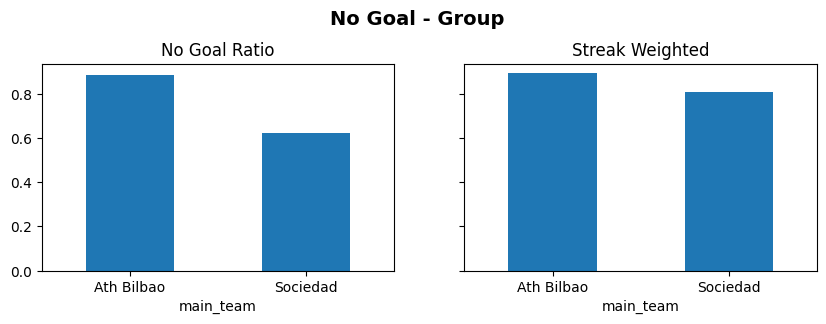

In [1758]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"No Goal - Group", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

ngg[['main_team','no_goal_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='No Goal Ratio', ax=axes[0])
ngg[['main_team','no_goal_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

### No Goal - Group - Home/Away

In [1759]:
nggah = pd.concat([no_goal_group_away_home[(no_goal_group_away_home.main_team == home_team)\
                        &(no_goal_group_away_home.competition==competition)\
                        &(no_goal_group_away_home.away_home=='home')\
                        &(no_goal_group_away_home.team_group==away_team_group)],\
           no_goal_group_away_home[(no_goal_group_away_home.main_team == away_team)\
                        &(no_goal_group_away_home.competition==competition)\
                        &(no_goal_group_away_home.away_home=='away')\
                        &(no_goal_group_away_home.team_group==home_team_group)]])

In [1760]:
nggah[['main_team','n_matches','no_goal_ratio', 'no_goal_streak_weighted_ratio']].set_index('main_team')

,n_matches,no_goal_ratio,no_goal_streak_weighted_ratio
main_team,,,
Ath Bilbao,5,1.0,1.0
Sociedad,3,1.0,1.0


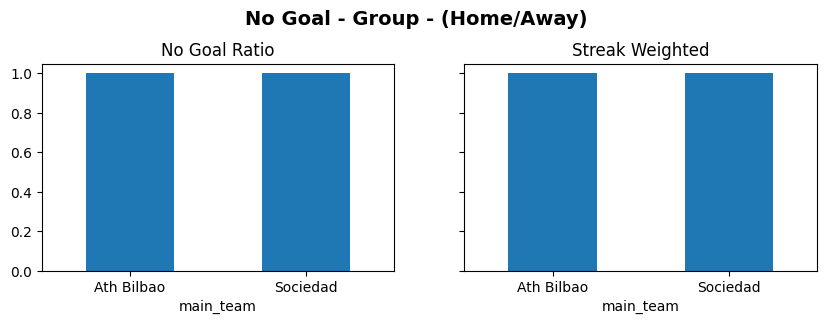

In [1761]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"No Goal - Group - (Home/Away)", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

nggah[['main_team','no_goal_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='No Goal Ratio', ax=axes[0])
nggah[['main_team','no_goal_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

### Has Scored - Group

In [1762]:
scgg = pd.concat([scored_conceded_goal_group[(scored_conceded_goal_group.main_team == home_team)\
                        &(scored_conceded_goal_group.competition==competition)\
                        &(scored_conceded_goal_group.team_group.isin([away_team_group]))],\
           scored_conceded_goal_group[(scored_conceded_goal_group.main_team == away_team)\
                        &(scored_conceded_goal_group.competition==competition)\
                        &(scored_conceded_goal_group.team_group.isin([home_team_group]))]])

In [1763]:
scgg[['main_team','n_matches','team_has_scored_ratio','team_has_scored_streak_weighted_ratio']].set_index('main_team')

,n_matches,team_has_scored_ratio,team_has_scored_streak_weighted_ratio
main_team,,,
Ath Bilbao,9,0.333333,0.366460
Sociedad,8,0.500000,0.258333


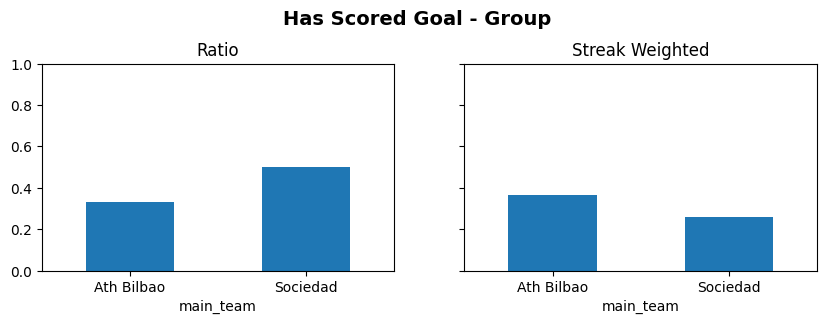

In [1764]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Has Scored Goal - Group", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

scgg[['main_team','team_has_scored_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
scgg[['main_team','team_has_scored_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

### Has Scored - Group - Home/Away

In [1765]:
tt = scored_conceded_goal_group_away_home
scggah = pd.concat([tt[(tt.main_team == home_team)\
                        &(tt.competition==competition)\
                        &(tt.away_home=='home')\
                        &(tt.team_group.isin([away_team_group]))],\
                   tt[(tt.main_team == away_team)\
                        &(tt.competition==competition)\
                        &(tt.away_home=='away')\
                        &(tt.team_group.isin([home_team_group]))]])

In [1766]:
scggah[['main_team','n_matches','away_home',\
      'team_has_scored_ratio','team_has_scored_streak_weighted_ratio']].set_index('main_team')

,n_matches,away_home,team_has_scored_ratio,team_has_scored_streak_weighted_ratio
main_team,,,,
Ath Bilbao,5,home,0.4,0.442105
Sociedad,3,away,0.0,0.000000


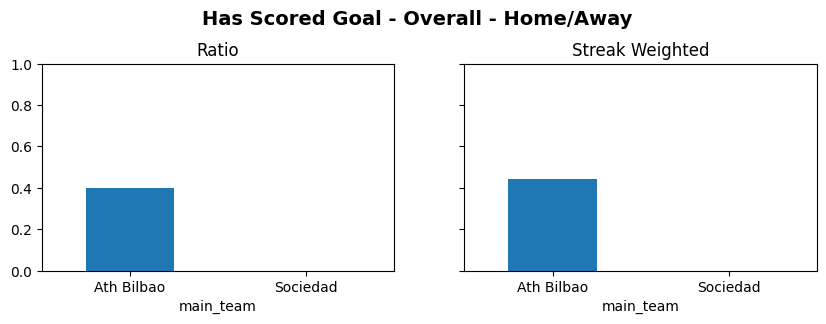

In [1767]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Has Scored Goal - Overall - Home/Away", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

scggah[['main_team','team_has_scored_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
scggah[['main_team','team_has_scored_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

In [1768]:
matches_df[(matches_df.main_team=='Roma')&(matches_df.away_home=='home')\
           &(matches_df.team_group==int(away_team_group))]\
        [['opponent_team','goal_fatti',
          'away_home','giornata','team_group']].sort_values('giornata')

,opponent_team,goal_fatti,away_home,giornata,team_group
1365,Atalanta,0,home,7.0,0
2140,Napoli,0,home,11.0,0
2561,Lazio,0,home,13.0,0
4946,Juventus,1,home,25.0,0


### Has Conceded - Group

In [1769]:
scgg[['main_team','n_matches','team_has_conceded_goal_ratio',\
      'team_has_conceded_goal_streak_weighted_ratio']].set_index('main_team')

,n_matches,team_has_conceded_goal_ratio,team_has_conceded_goal_streak_weighted_ratio
main_team,,,
Ath Bilbao,9,0.666667,0.645963
Sociedad,8,0.750000,0.775000


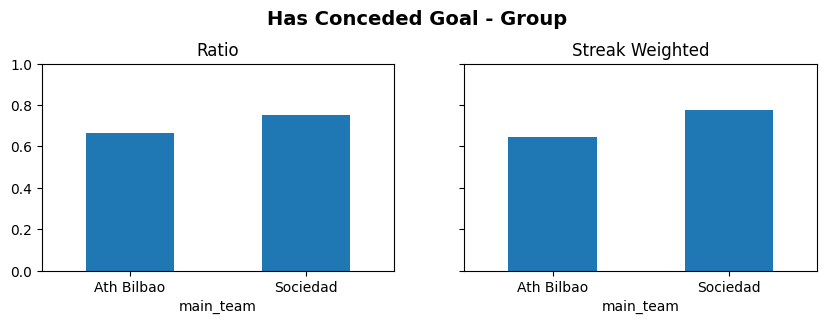

In [1770]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Has Conceded Goal - Group", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

scgg[['main_team','team_has_conceded_goal_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
scgg[['main_team','team_has_conceded_goal_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

### Wins/Draws/Loss

In [1771]:
wdl = pd.concat([win_draw_loss[(win_draw_loss.main_team == home_team)\
                        &(win_draw_loss.competition==competition)\
                        &(win_draw_loss.team_group.isin(['all']))],\
           win_draw_loss[(win_draw_loss.main_team == away_team)\
                        &(win_draw_loss.competition==competition)\
                        &(win_draw_loss.team_group.isin(['all']))]])

In [1772]:
wdlg = pd.concat([win_draw_loss[(win_draw_loss.main_team == home_team)\
                        &(win_draw_loss.competition==competition)\
                        &(win_draw_loss.team_group==str(away_team_group))],\
           win_draw_loss[(win_draw_loss.main_team == away_team)\
                        &(win_draw_loss.competition==competition)\
                        &(win_draw_loss.team_group==str(home_team_group))]])
wdlg

,main_team,team_group,competition,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
16,Ath Bilbao,0,La Liga,9,0.222222,0.111111,0.666667,42.0,15.0,104.0,161.0,0.260870,0.093168,0.645963
244,Sociedad,0,La Liga,8,0.250000,0.250000,0.500000,25.0,23.0,72.0,120.0,0.208333,0.191667,0.600000


In [1773]:
wdlgah = pd.concat([win_draw_loss_away_home[(win_draw_loss_away_home.main_team == home_team)\
                        &(win_draw_loss_away_home.competition==competition)\
                        &(win_draw_loss_away_home.away_home=='home')\
                        &(win_draw_loss_away_home.team_group.apply(str)==str(away_team_group))],\
           win_draw_loss_away_home[(win_draw_loss_away_home.main_team == away_team)\
                        &(win_draw_loss_away_home.away_home=='away')\
                        &(win_draw_loss_away_home.competition==competition)\
                        &(win_draw_loss_away_home.team_group.apply(str)==str(home_team_group))]])
wdlgah

,main_team,team_group,competition,away_home,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
33,Ath Bilbao,0,La Liga,home,5,0.4,0.000000,0.600000,42.0,0.0,53.0,95.0,0.442105,0.000000,0.557895
488,Sociedad,0,La Liga,away,3,0.0,0.333333,0.666667,0.0,19.0,58.0,77.0,0.000000,0.246753,0.753247


#### Wins Overall

In [1774]:
wdl[['main_team','n_matches']].set_index('main_team')

,n_matches
main_team,
Ath Bilbao,29
Sociedad,29


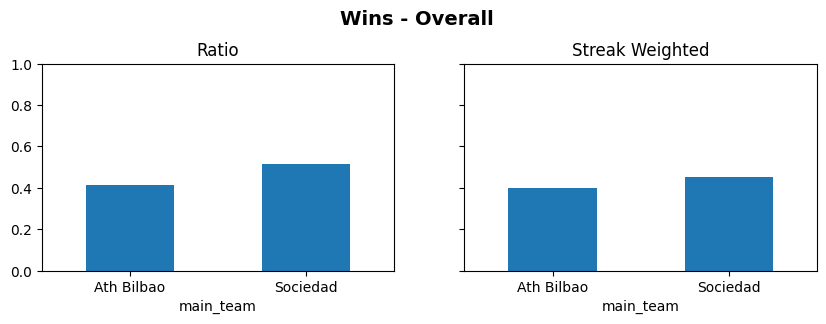

In [1775]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Wins - Overall", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

wdl[['main_team','avg_win']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
wdl[['main_team','win_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

#### Wins VS Group

In [1776]:
wdlg[['main_team','n_matches']].set_index('main_team')

,n_matches
main_team,
Ath Bilbao,9
Sociedad,8


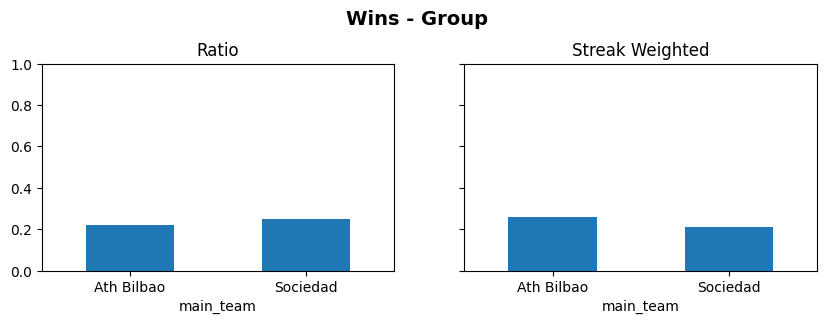

In [1777]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Wins - Group", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

wdlg[['main_team','avg_win']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
wdlg[['main_team','win_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

#### Wins - Group - Home/Away

In [1778]:
wdlgah[['main_team','n_matches']].set_index('main_team')

,n_matches
main_team,
Ath Bilbao,5
Sociedad,3


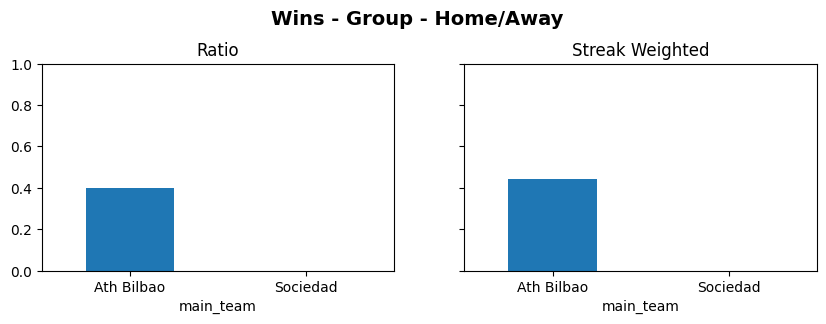

In [1779]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Wins - Group - Home/Away", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

wdlgah[['main_team','avg_win']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Ratio', ax=axes[0])
wdlgah[['main_team','win_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

#### Draws - Group

In [1780]:
wdlgah[['main_team','n_matches']].set_index('main_team')

,n_matches
main_team,
Ath Bilbao,5
Sociedad,3


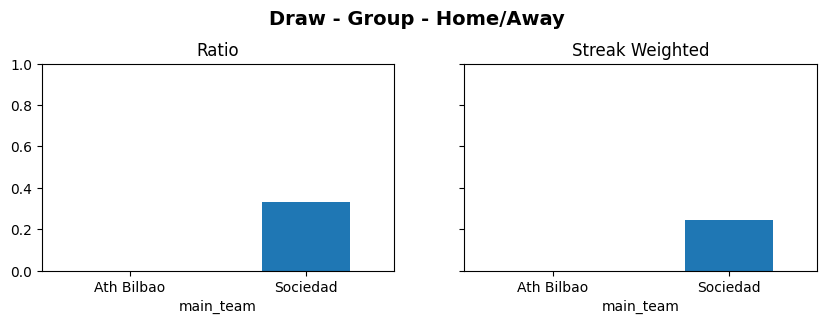

In [1781]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Draw - Group - Home/Away", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

wdlgah[['main_team','avg_draw']].set_index('main_team').plot(kind='bar',rot=0, title='Ratio', ylim=(0,1), ax=axes[0])
wdlgah[['main_team','draw_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

#### Loss - Group

In [1782]:
wdlg[['main_team','n_matches']].set_index('main_team')

,n_matches
main_team,
Ath Bilbao,9
Sociedad,8


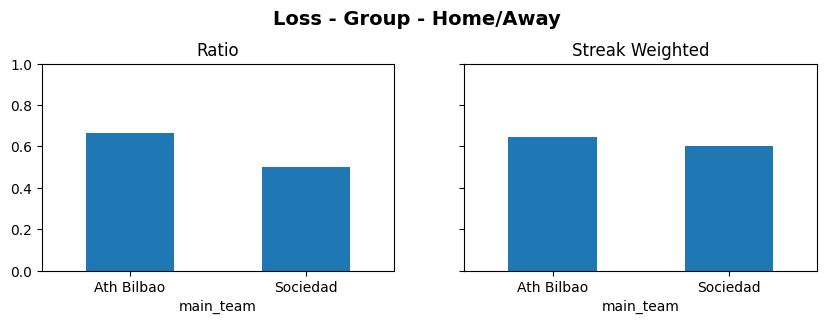

In [1783]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle(f"Loss - Group - Home/Away", fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8)

wdlg[['main_team','avg_loss']].set_index('main_team').plot(kind='bar',rot=0, title='Ratio', ylim=(0,1), ax=axes[0])
wdlg[['main_team','loss_streak_weighted_ratio']].set_index('main_team').plot(kind='bar',rot=0, ylim=(0,1), title='Streak Weighted', ax=axes[1])

[ax.legend().set_visible(False) for ax in axes]
plt.show()

In [1784]:
matches_df[(matches_df.main_team==away_team)]\
        .sort_values('giornata')\
        [['main_team','opponent_team','away_home','result',
          'giornata','team_group','team_has_conceded_goal']]

,main_team,opponent_team,away_home,result,giornata,team_group,team_has_conceded_goal
26967,Sociedad,Cadiz,away,Win,1.0,2,False
21412,Sociedad,Barcelona,home,Loss,2.0,0,True
27331,Sociedad,Elche,away,Win,3.0,2,False
21734,Sociedad,Ath Madrid,home,Draw,4.0,0,True
27826,Sociedad,Getafe,away,Loss,5.0,2,True
22250,Sociedad,Espanol,home,Win,6.0,2,True
28220,Sociedad,Girona,away,Win,7.0,1,True
22617,Sociedad,Villarreal,home,Win,8.0,0,False
28583,Sociedad,Celta,away,Win,9.0,1,True
22982,Sociedad,Mallorca,home,Win,10.0,1,False
